<a href="https://colab.research.google.com/github/bintangfikrif/Unnamed-Final_Project/blob/main/notebooks/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install & Import General Library**

In [ ]:
pip install linearmodels

In [ ]:
pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from scipy import stats
from statsmodels.tools.sm_exceptions import ConvergenceWarning, HessianInversionWarning, ValueWarning
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("viridis")

# **Load Dataset**

In [ ]:
# --- 1. Load Datasets ---
try:
    forest_df = pd.read_csv('/content/spatial-metrics-indonesia-remaining_forest_province.csv')
    deforest_df = pd.read_csv('/content/spatial-metrics-indonesia-territorial_deforestation_province.csv')

    print("Natural Forest Area by Province")
    display(forest_df.head())

    print("\nDeforestation Area by Province")
    display(deforest_df.head())

except FileNotFoundError:
    print("Error: File not found. Please ensure the file forest and deforest exists in the current directory.")
    forest_df = None
    deforest_df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    forest_df = None
    deforest_df = None

Natural Forest Area by Province


,year,country,country_iso2,region,region_trase_id,parent_region,parent_region_trase_id,natural_forest_area_hectares
0,2001,INDONESIA,ID,ACEH,ID-11,SUMATERA,ID-SM,3.624507e+06
1,2001,INDONESIA,ID,BALI,ID-51,NUSA TENGGARA,ID-NU,6.375161e+04
2,2001,INDONESIA,ID,BANTEN,ID-36,JAWA,ID-JW,6.599245e+04
3,2001,INDONESIA,ID,BENGKULU,ID-17,SUMATERA,ID-SM,2.682920e+05
4,2001,INDONESIA,ID,D I YOGYAKARTA,ID-34,JAWA,ID-JW,1.080000e+01



Deforestation Area by Province


,year,country,country_iso2,region,region_trase_id,parent_region,parent_region_trase_id,deforestation_hectares
0,2001,INDONESIA,ID,ACEH,ID-11,SUMATERA,ID-SM,4097.692235
1,2001,INDONESIA,ID,BALI,ID-51,NUSA TENGGARA,ID-NU,5.130000
2,2001,INDONESIA,ID,BANTEN,ID-36,JAWA,ID-JW,1.260000
3,2001,INDONESIA,ID,BENGKULU,ID-17,SUMATERA,ID-SM,1906.404000
4,2001,INDONESIA,ID,D I YOGYAKARTA,ID-34,JAWA,ID-JW,0.000000


# **Exploratory Data Analysis (EDA)**



 Analisis Data Eksploratif: Luas Hutan Alami per Provinsi 
------------------------------------------------------------

 Informasi Dataset Luas Hutan Alami:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          748 non-null    int64  
 1   country                       748 non-null    object 
 2   country_iso2                  748 non-null    object 
 3   region                        748 non-null    object 
 4   region_trase_id               748 non-null    object 
 5   parent_region                 748 non-null    object 
 6   parent_region_trase_id        748 non-null    object 
 7   natural_forest_area_hectares  748 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 46.9+ KB

 Statistik Deskriptif Luas Hutan Alami:


,year,country,country_iso2,region,region_trase_id,parent_region,parent_region_trase_id,natural_forest_area_hectares
count,748.000000,748,748,748,748,748,748,7.480000e+02
unique,NaN,1,1,34,34,7,7,NaN
top,NaN,INDONESIA,ID,ACEH,ID-11,SUMATERA,ID-SM,NaN
freq,NaN,748,748,22,22,220,220,NaN
mean,2011.500000,NaN,NaN,NaN,NaN,NaN,NaN,2.705803e+06
std,6.348534,NaN,NaN,NaN,NaN,NaN,NaN,4.683202e+06
min,2001.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.720000e+00
25%,2006.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.548762e+05
50%,2011.500000,NaN,NaN,NaN,NaN,NaN,NaN,8.713053e+05
75%,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.074278e+06



 Pengecekan Nilai Hilang Luas Hutan Alami:


,0
year,0
country,0
country_iso2,0
region,0
region_trase_id,0
parent_region,0
parent_region_trase_id,0
natural_forest_area_hectares,0


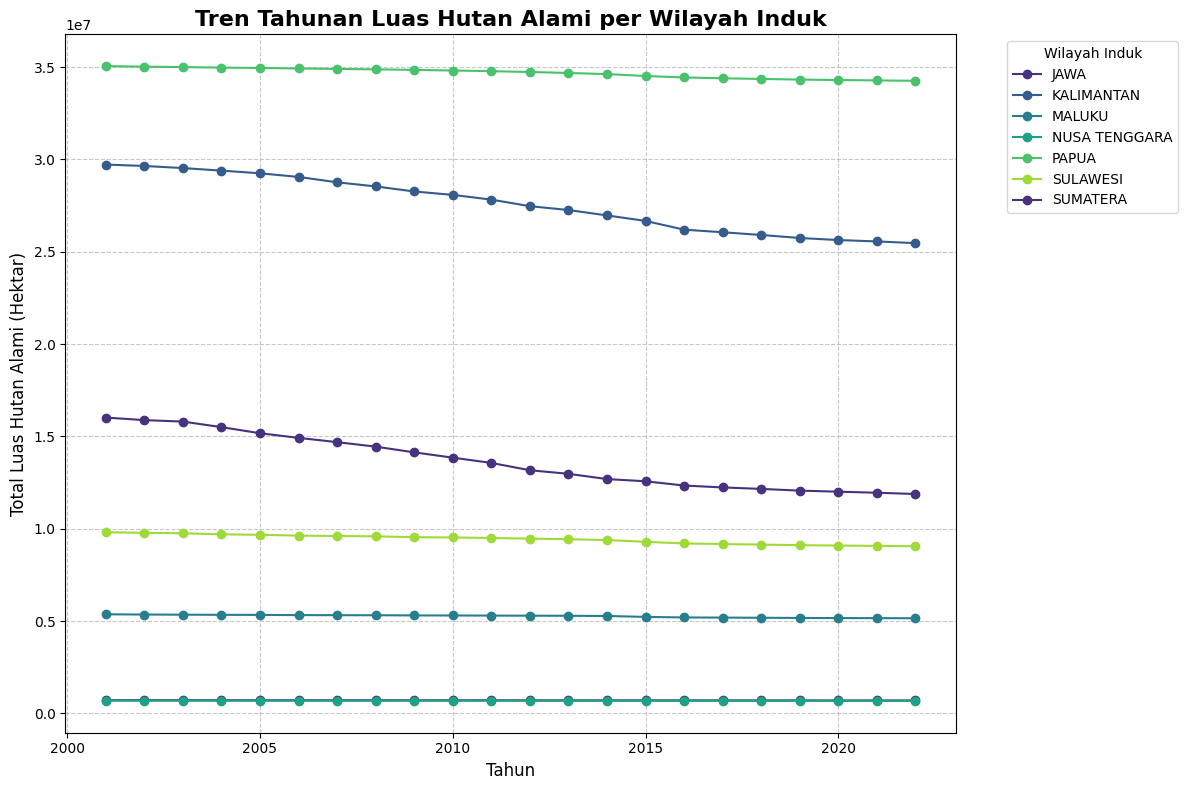

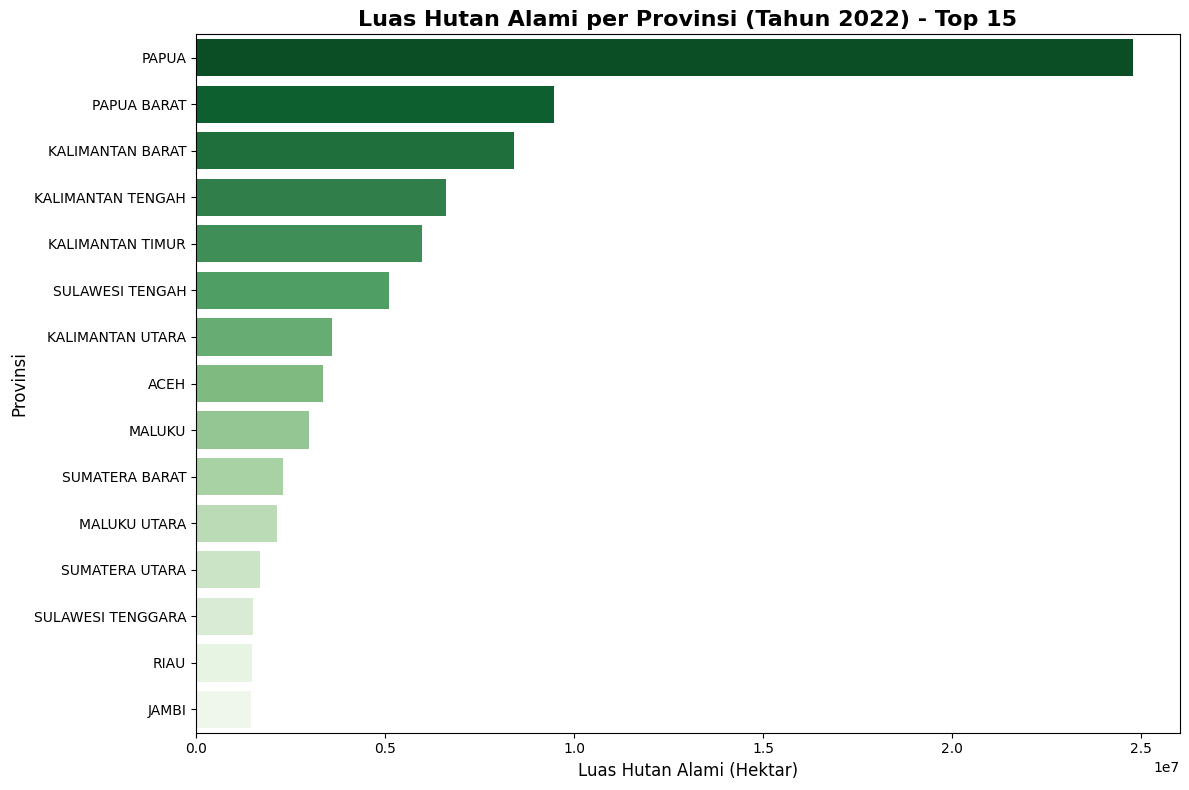

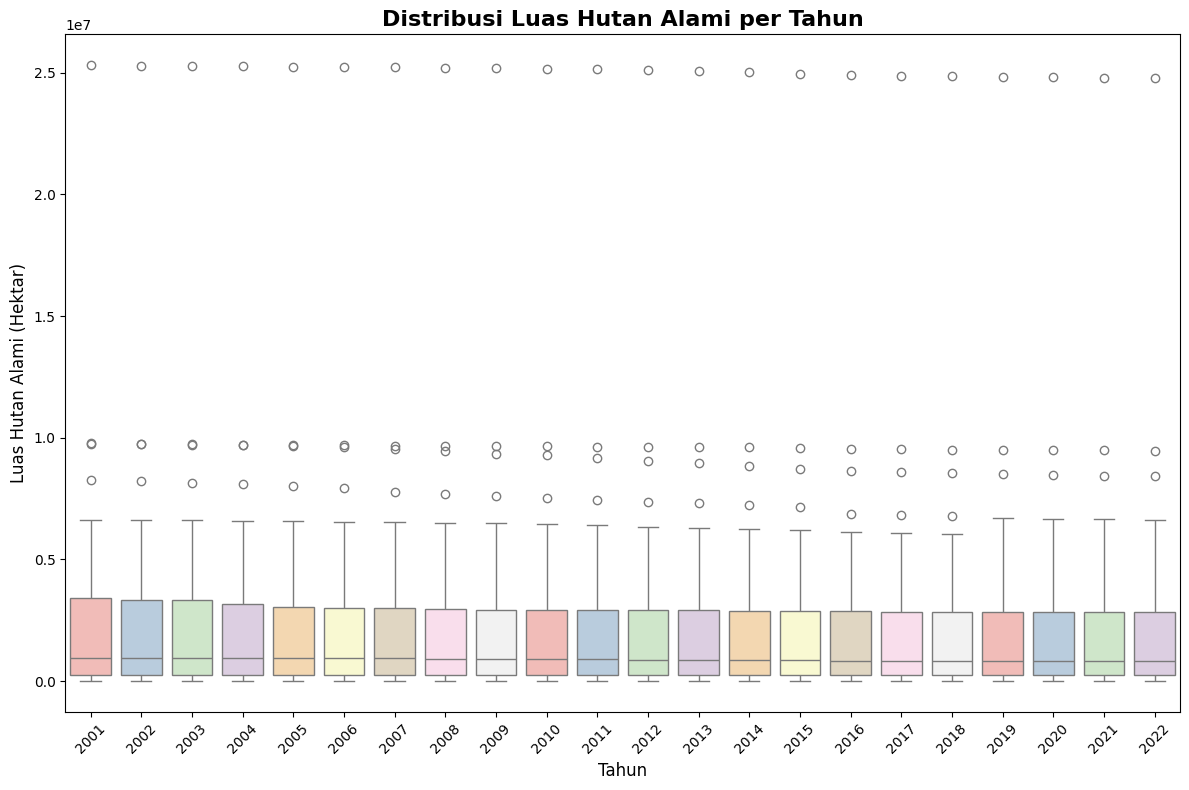

In [ ]:
# --- EDA untuk Data Luas Hutan Alami (Natural Forest Area) ---
if forest_df is not None:
    print("\n\n Analisis Data Eksploratif: Luas Hutan Alami per Provinsi ")
    print("-" * 60)

    print("\n Informasi Dataset Luas Hutan Alami:")
    forest_df.info()

    print("\n Statistik Deskriptif Luas Hutan Alami:")
    display(forest_df.describe(include='all'))

    print("\n Pengecekan Nilai Hilang Luas Hutan Alami:")
    display(forest_df.isnull().sum())

    # Visualisasi untuk Luas Hutan Alami
    # Tren Tahunan Luas Hutan Alami per Wilayah Induk (Parent Region)
    plt.figure()
    forest_trend_parent = forest_df.groupby(['year', 'parent_region'])['natural_forest_area_hectares'].sum().unstack()
    forest_trend_parent.plot(kind='line', marker='o', ax=plt.gca())
    plt.title('Tren Tahunan Luas Hutan Alami per Wilayah Induk', fontsize=16, fontweight='bold')
    plt.xlabel('Tahun', fontsize=12)
    plt.ylabel('Total Luas Hutan Alami (Hektar)', fontsize=12)
    plt.legend(title='Wilayah Induk', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Distribusi Luas Hutan Alami pada Tahun Terakhir
    if not forest_df.empty:
        latest_year_forest = forest_df['year'].max()
        plt.figure()
        forest_latest_year_data = forest_df[forest_df['year'] == latest_year_forest].sort_values(by='natural_forest_area_hectares', ascending=False)
        sns.barplot(x='natural_forest_area_hectares', y='region', data=forest_latest_year_data.head(15), palette='Greens_r')
        plt.title(f'Luas Hutan Alami per Provinsi (Tahun {latest_year_forest}) - Top 15', fontsize=16, fontweight='bold')
        plt.xlabel('Luas Hutan Alami (Hektar)', fontsize=12)
        plt.ylabel('Provinsi', fontsize=12)
        plt.tight_layout()
        plt.show()

    # Boxplot Distribusi Luas Hutan Alami per Tahun
    plt.figure()
    sns.boxplot(x='year', y='natural_forest_area_hectares', data=forest_df, palette='Pastel1')
    plt.title('Distribusi Luas Hutan Alami per Tahun', fontsize=16, fontweight='bold')
    plt.xlabel('Tahun', fontsize=12)
    plt.ylabel('Luas Hutan Alami (Hektar)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("\nDataset Luas Hutan Alami tidak berhasil dimuat. EDA dilewati.")



 Analisis Data Eksploratif: Deforestasi per Provinsi 
------------------------------------------------------------

 Informasi Dataset Deforestasi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    748 non-null    int64  
 1   country                 748 non-null    object 
 2   country_iso2            748 non-null    object 
 3   region                  748 non-null    object 
 4   region_trase_id         748 non-null    object 
 5   parent_region           748 non-null    object 
 6   parent_region_trase_id  748 non-null    object 
 7   deforestation_hectares  748 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 46.9+ KB

 Statistik Deskriptif Deforestasi:


,year,country,country_iso2,region,region_trase_id,parent_region,parent_region_trase_id,deforestation_hectares
count,748.000000,748,748,748,748,748,748,748.000000
unique,NaN,1,1,34,34,7,7,NaN
top,NaN,INDONESIA,ID,ACEH,ID-11,SUMATERA,ID-SM,NaN
freq,NaN,748,748,22,22,220,220,NaN
mean,2011.500000,NaN,NaN,NaN,NaN,NaN,NaN,13898.697182
std,6.348534,NaN,NaN,NaN,NaN,NaN,NaN,28894.803285
min,2001.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,2006.000000,NaN,NaN,NaN,NaN,NaN,NaN,417.120441
50%,2011.500000,NaN,NaN,NaN,NaN,NaN,NaN,2950.012412
75%,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,14626.305000



 Pengecekan Nilai Hilang Deforestasi:


,0
year,0
country,0
country_iso2,0
region,0
region_trase_id,0
parent_region,0
parent_region_trase_id,0
deforestation_hectares,0


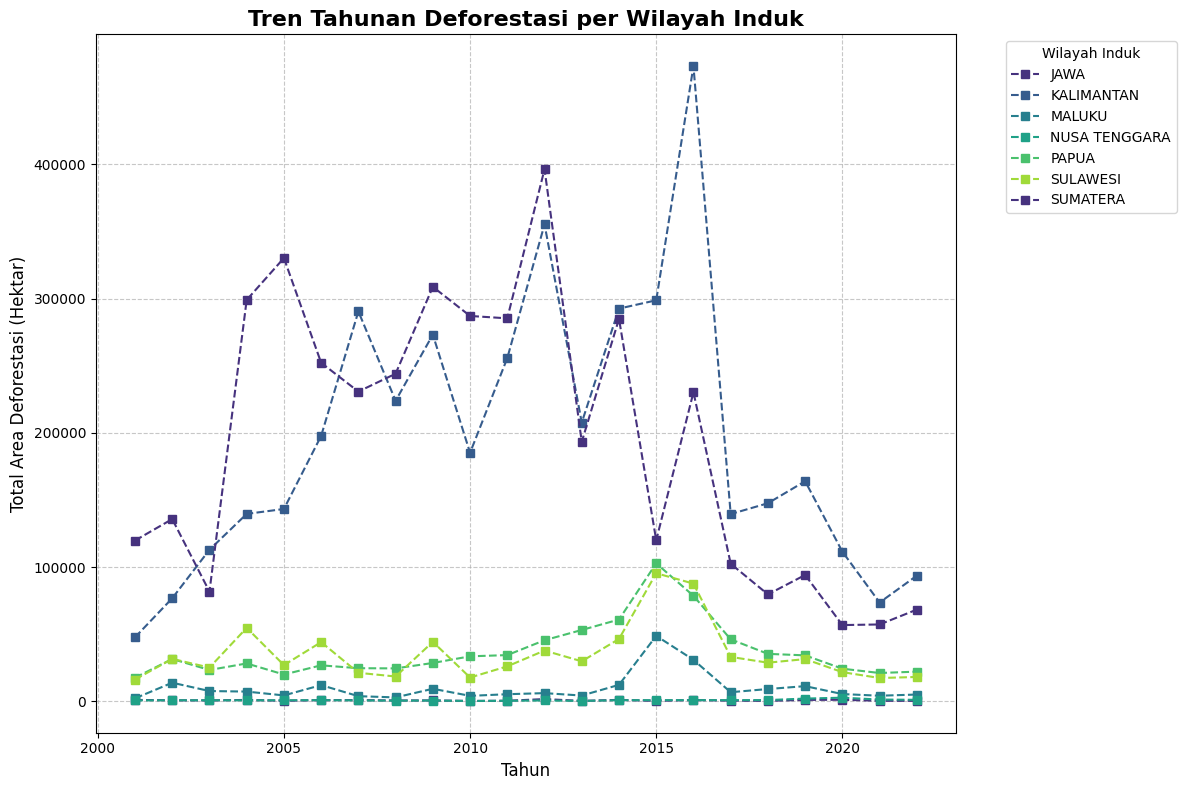

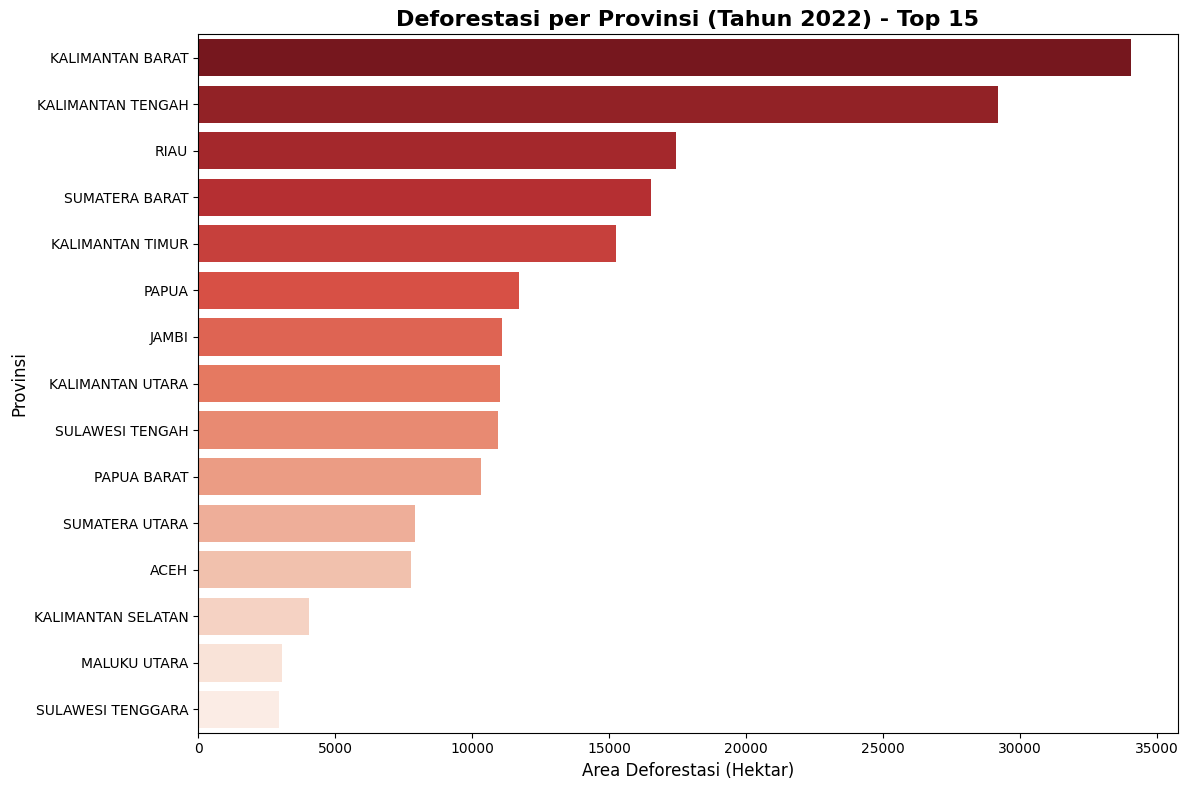

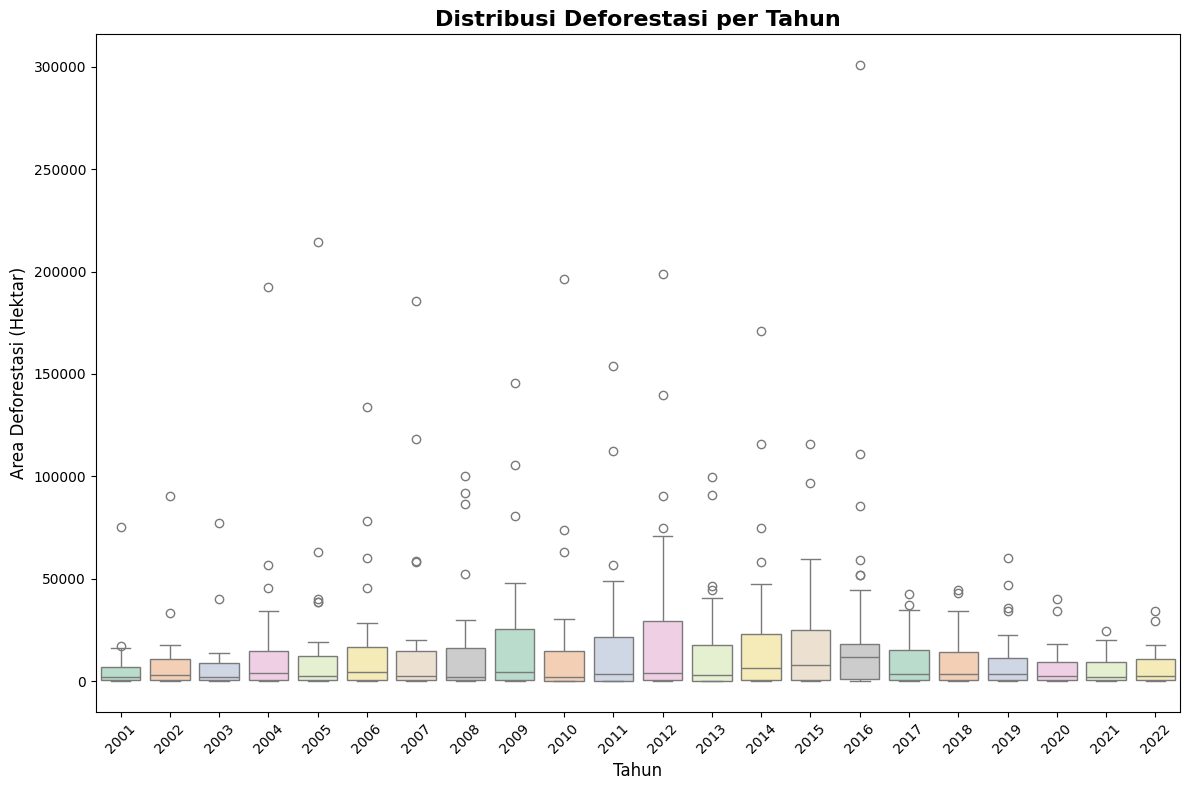

In [ ]:
# --- EDA untuk Data Deforestasi ---
if deforest_df is not None:
    print("\n\n Analisis Data Eksploratif: Deforestasi per Provinsi ")
    print("-" * 60)

    print("\n Informasi Dataset Deforestasi:")
    deforest_df.info()

    print("\n Statistik Deskriptif Deforestasi:")
    display(deforest_df.describe(include='all'))

    print("\n Pengecekan Nilai Hilang Deforestasi:")
    display(deforest_df.isnull().sum())

    # Visualisasi untuk Deforestasi
    # Tren Tahunan Deforestasi per Wilayah Induk (Parent Region)
    plt.figure()
    deforest_trend_parent = deforest_df.groupby(['year', 'parent_region'])['deforestation_hectares'].sum().unstack()
    deforest_trend_parent.plot(kind='line', marker='s', linestyle='--', ax=plt.gca())
    plt.title('Tren Tahunan Deforestasi per Wilayah Induk', fontsize=16, fontweight='bold')
    plt.xlabel('Tahun', fontsize=12)
    plt.ylabel('Total Area Deforestasi (Hektar)', fontsize=12)
    plt.legend(title='Wilayah Induk', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Distribusi Deforestasi pada Tahun Terakhir
    if not deforest_df.empty:
        latest_year_deforest = deforest_df['year'].max()
        plt.figure()
        deforest_latest_year_data = deforest_df[deforest_df['year'] == latest_year_deforest].sort_values(by='deforestation_hectares', ascending=False)
        sns.barplot(x='deforestation_hectares', y='region', data=deforest_latest_year_data.head(15), palette='Reds_r')
        plt.title(f'Deforestasi per Provinsi (Tahun {latest_year_deforest}) - Top 15', fontsize=16, fontweight='bold')
        plt.xlabel('Area Deforestasi (Hektar)', fontsize=12)
        plt.ylabel('Provinsi', fontsize=12)
        plt.tight_layout()
        plt.show()

    # Boxplot Distribusi Deforestasi per Tahun
    plt.figure()
    sns.boxplot(x='year', y='deforestation_hectares', data=deforest_df, palette='Pastel2')
    plt.title('Distribusi Deforestasi per Tahun', fontsize=16, fontweight='bold')
    plt.xlabel('Tahun', fontsize=12)
    plt.ylabel('Area Deforestasi (Hektar)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("\nDataset Deforestasi tidak berhasil dimuat. EDA dilewati.")

# **Data Cleaning**

In [ ]:
# --- Merging data ---
if forest_df is not None and deforest_df is not None:
    # Convert relevant columns to numeric
    forest_df['natural_forest_area_hectares'] = pd.to_numeric(forest_df['natural_forest_area_hectares'], errors='coerce')
    deforest_df['deforestation_hectares'] = pd.to_numeric(deforest_df['deforestation_hectares'], errors='coerce')

    # Merge datasets
    merged_df = pd.merge(forest_df, deforest_df, on=['year', 'region'], suffixes=('_forest', '_deforest'))
    merged_df = merged_df.sort_values(['region', 'year']).reset_index(drop=True)

    # Handle potential NaNs from conversion or merge
    merged_df = merged_df.dropna(subset=['natural_forest_area_hectares', 'deforestation_hectares'])

    # --- Save Merged Dataset ---
    output_filename = "merged_spatial_data.csv"
    merged_df.to_csv(output_filename, index=False)
    print(f"\nMerged dataset saved as {output_filename}")

    # --- Display Merged Dataset Overview ---
    print("\nDataset Overview:")
    print(f"Total records: {len(merged_df)}")
    print(f"Provinces: {merged_df['region'].nunique()}")
    print(f"Years: {merged_df['year'].min()} - {merged_df['year'].max()}")
    print("First 5 rows of merged data:")
    display(merged_df.head())
else:
    print("\nSkipping preprocessing, merging, and saving due to data loading errors.")


Merged dataset saved as merged_spatial_data.csv

Dataset Overview:
Total records: 748
Provinces: 34
Years: 2001 - 2022
First 5 rows of merged data:


,year,country_forest,country_iso2_forest,region,region_trase_id_forest,parent_region_forest,parent_region_trase_id_forest,natural_forest_area_hectares,country_deforest,country_iso2_deforest,region_trase_id_deforest,parent_region_deforest,parent_region_trase_id_deforest,deforestation_hectares
0,2001,INDONESIA,ID,ACEH,ID-11,SUMATERA,ID-SM,3.624507e+06,INDONESIA,ID,ID-11,SUMATERA,ID-SM,4097.692235
1,2002,INDONESIA,ID,ACEH,ID-11,SUMATERA,ID-SM,3.621571e+06,INDONESIA,ID,ID-11,SUMATERA,ID-SM,2935.927765
2,2003,INDONESIA,ID,ACEH,ID-11,SUMATERA,ID-SM,3.615809e+06,INDONESIA,ID,ID-11,SUMATERA,ID-SM,5761.893176
3,2004,INDONESIA,ID,ACEH,ID-11,SUMATERA,ID-SM,3.610221e+06,INDONESIA,ID,ID-11,SUMATERA,ID-SM,5588.036118
4,2005,INDONESIA,ID,ACEH,ID-11,SUMATERA,ID-SM,3.600450e+06,INDONESIA,ID,ID-11,SUMATERA,ID-SM,9770.899765


# **GRU Model**

## **Pre-processing Dataset**

In [ ]:
# Agregasi data ke tingkat nasional per tahun
df_nasional_gru = df_full.groupby('year').agg(
    total_natural_forest_area_hectares=('natural_forest_area_hectares', 'sum'),
    total_deforestation_hectares=('deforestation_hectares', 'sum')
).reset_index()

# Mengganti nama kolom agar lebih sederhana untuk langkah selanjutnya
df_nasional_gru.rename(columns={
    'total_natural_forest_area_hectares': 'natural_forest_area',
    'total_deforestation_hectares': 'deforestation_rate'
}, inplace=True)

# Mengurutkan data berdasarkan tahun
df_nasional_gru = df_nasional_gru.sort_values(by='year').reset_index(drop=True)

# Menampilkan data tingkat nasional yang sudah diproses
print("\nData Luas Hutan Alam dan Laju Deforestasi Tingkat Nasional (untuk GRU):")
print(df_nasional_gru)
print("\nInformasi Dataset Nasional (untuk GRU):")
df_nasional_gru.info()

# Menyimpan data nasional ke CSV baru
df_nasional_gru.to_csv('data_nasional_gru_2001_2022.csv', index=False)
print("\nData nasional (untuk GRU) telah disimpan ke 'data_nasional_gru_2001_2022.csv'")


Data Luas Hutan Alam dan Laju Deforestasi Tingkat Nasional (untuk GRU):
    year  natural_forest_area  deforestation_rate
0   2001         9.737151e+07       204644.310353
1   2002         9.708090e+07       290609.436000
2   2003         9.682918e+07       251720.659059
3   2004         9.629900e+07       530175.656471
4   2005         9.577338e+07       525618.947647
5   2006         9.523916e+07       534224.838706
6   2007         9.466703e+07       572128.815177
7   2008         9.415248e+07       514552.248353
8   2009         9.348747e+07       665007.237882
9   2010         9.295983e+07       527644.369765
10  2011         9.235260e+07       607226.029412
11  2012         9.150951e+07       843086.399294
12  2013         9.102113e+07       488386.072941
13  2014         9.032247e+07       698654.655882
14  2015         8.965598e+07       666493.601294
15  2016         8.875378e+07       902197.582235
16  2017         8.842486e+07       328919.296941
17  2018         8.812358e+

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Memuat dataset
try:
    df_nasional_gru = pd.read_csv('data_nasional_gru_2001_2022.csv')
except FileNotFoundError:
    print("Error: File 'data_nasional_gru_2001_2022.csv' tidak ditemukan.")
    exit()

print("Data Nasional (untuk GRU) yang Dimuat:")
print(df_nasional_gru.head())

Data Nasional (untuk GRU) yang Dimuat:
   year  natural_forest_area  deforestation_rate
0  2001         9.737151e+07       204644.310353
1  2002         9.708090e+07       290609.436000
2  2003         9.682918e+07       251720.659059
3  2004         9.629900e+07       530175.656471
4  2005         9.577338e+07       525618.947647


In [ ]:
# Mendefinisikan fitur dan melakukan scaling
features = ['natural_forest_area', 'deforestation_rate']
data_for_scaling_gru = df_nasional_gru[features].values

scaler_gru = MinMaxScaler(feature_range=(0, 1))
scaled_data_gru = scaler_gru.fit_transform(data_for_scaling_gru)

joblib.dump(scaler_gru, 'scaler_gru.pkl')
print("\nScaler GRU telah disimpan ke 'scaler_gru.pkl'")


Scaler GRU telah disimpan ke 'scaler_gru.pkl'


In [ ]:
# Membagi data menjadi set latih dan uji berdasarkan tahun
train_years_condition_gru = df_nasional_gru['year'] <= 2019
test_years_condition_gru = df_nasional_gru['year'] >= 2020

scaled_train_data_gru = scaled_data_gru[train_years_condition_gru.values]
scaled_test_data_gru = scaled_data_gru[test_years_condition_gru.values]

# Menyimpan nilai aktual untuk evaluasi
actual_test_forest_area_gru = df_nasional_gru.loc[test_years_condition_gru, 'natural_forest_area'].values

print(f"\nJumlah data latih: {len(scaled_train_data_gru)}")
print(f"Tahun data latih: {df_nasional_gru.loc[train_years_condition_gru, 'year'].min()} - {df_nasional_gru.loc[train_years_condition_gru, 'year'].max()}")
print(f"Jumlah data uji: {len(scaled_test_data_gru)}")
print(f"Tahun data uji: {df_nasional_gru.loc[test_years_condition_gru, 'year'].min()} - {df_nasional_gru.loc[test_years_condition_gru, 'year'].max()}")
print(f"Jumlah data aktual untuk pengujian: {len(actual_test_forest_area_gru)}")


Jumlah data latih: 19
Tahun data latih: 2001 - 2019
Jumlah data uji: 3
Tahun data uji: 2020 - 2022
Jumlah data aktual untuk pengujian: 3


In [ ]:
# Fungsi untuk membuat sekuens data untuk GRU
def create_gru_sequences(input_data, n_steps_in):
    X, y = [], []
    for i in range(len(input_data)):
        end_ix = i + n_steps_in
        if end_ix >= len(input_data):
            break
        seq_x = input_data[i:end_ix, :]
        seq_y = input_data[end_ix, 0] # Target fitur pertama ('natural_forest_area')
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Menentukan jumlah langkah waktu untuk sekuens
n_steps_gru = 3

# Membuat sekuens untuk data latih
X_train_gru, y_train_gru = create_gru_sequences(scaled_train_data_gru, n_steps_gru)

# Membuat sekuens untuk data uji
# Menggabungkan bagian akhir data latih dengan data uji untuk membentuk sekuens input pertama untuk set uji
if len(scaled_train_data_gru) >= n_steps_gru:
    temp_for_X_test_gru = np.concatenate((scaled_train_data_gru[-n_steps_gru:], scaled_test_data_gru))
    X_test_gru, _ = create_gru_sequences(temp_for_X_test_gru, n_steps_gru)
    # Menyesuaikan panjang X_test_gru agar sesuai dengan jumlah target aktual di set uji
    X_test_gru = X_test_gru[:len(actual_test_forest_area_gru)]
else:
    X_test_gru = np.array([]) # Jika data latih tidak cukup untuk membuat sekuens awal
    print("\nData latih tidak cukup untuk membuat sekuens awal bagi data uji dengan n_steps_gru yang diberikan.")


print(f"\nBentuk X_train_gru: {X_train_gru.shape}")
print(f"Bentuk y_train_gru: {y_train_gru.shape}")
print(f"Bentuk X_test_gru: {X_test_gru.shape}")
print(f"Bentuk y_test_gru (aktual): {actual_test_forest_area_gru.shape}")


Bentuk X_train_gru: (16, 3, 2)
Bentuk y_train_gru: (16,)
Bentuk X_test_gru: (3, 3, 2)
Bentuk y_test_gru (aktual): (3,)


In [ ]:
# Verifikasi singkat
if X_train_gru.size > 0:
    print("\nContoh X_train_gru pertama:")
    print(X_train_gru[0])
    print("\nContoh y_train_gru pertama (nilai target yang diskalakan):")
    print(y_train_gru[0])
else:
    print("\nX_train_gru kosong. Periksa n_steps_gru dan panjang data latih.")

if X_test_gru.size == 0 and len(actual_test_forest_area_gru) > 0 :
    print("\nX_test_gru kosong, namun ada data uji aktual. Periksa n_steps_gru dan bagaimana X_test_gru dibentuk.")


Contoh X_train_gru pertama:
[[1.         0.04120051]
 [0.97148534 0.15936112]
 [0.94678646 0.1059078 ]]

Contoh y_train_gru pertama (nilai target yang diskalakan):
0.894765519462883


In [ ]:
# Memastikan variabel data latih sudah ada
if 'X_train_gru' not in globals() or 'y_train_gru' not in globals():
    print("Error: Variabel X_train_gru atau y_train_gru tidak ditemukan.")
    print("Pastikan Langkah 2 (persiapan data) sudah dijalankan.")
    exit()

if X_train_gru.size == 0:
    print("Error: X_train_gru kosong. Tidak dapat melatih model.")
    print("Periksa n_steps_gru dan panjang data latih Anda di Langkah 2.")
    exit()

## **Build GRU Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf

print("--- Build Model GRU ---")
print(f"Menggunakan X_train_gru dengan bentuk: {X_train_gru.shape}")
print(f"Menggunakan y_train_gru dengan bentuk: {y_train_gru.shape}")

# Definisi model GRU
model_gru = Sequential([
    Input(shape=(X_train_gru.shape[1], X_train_gru.shape[2]), name='input_layer'),
    GRU(units=32, activation='relu', return_sequences=False, name='gru_layer_1'),
    # Dropout(0.1, name='dropout_1'), # Dapat diaktifkan jika terjadi overfitting
    Dense(units=16, activation='relu', name='dense_layer_1'),
    Dense(units=1, name='output_layer')
])

# Kompilasi model
optimizer_gru = tf.keras.optimizers.Adam(learning_rate=0.001)
model_gru.compile(optimizer=optimizer_gru, loss='mean_squared_error')

model_gru.summary()

# Callbacks untuk optimasi pelatihan
early_stopping_gru = EarlyStopping(
    monitor='loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

reduce_lr_gru = ReduceLROnPlateau(
    monitor='loss',
    factor=0.2,
    patience=10,
    min_lr=0.00001,
    verbose=1
)

--- Build Model GRU ---
Menggunakan X_train_gru dengan bentuk: (16, 3, 2)
Menggunakan y_train_gru dengan bentuk: (16,)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_layer_1 (GRU)               │ (None, 32)             │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer_1 (Dense)           │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,001 (15.63 KB)

 Trainable params: 4,001 (15.63 KB)

 Non-trainable params: 0 (0.00 B)

## **Train GRU Model**


Memulai pelatihan model GRU...
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.6485 - learning_rate: 0.0010
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5310 - learning_rate: 0.0010
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4311 - learning_rate: 0.0010
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3537 - learning_rate: 0.0010
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2979 - learning_rate: 0.0010
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2455 - learning_rate: 0.0010
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1942 - learning_rate: 0.0010
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1488 - learning_rate: 0.0010
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1118 - learning_rate: 0.0010
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0828 - learning_rate: 0.0010
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0617 - learning_rate: 0

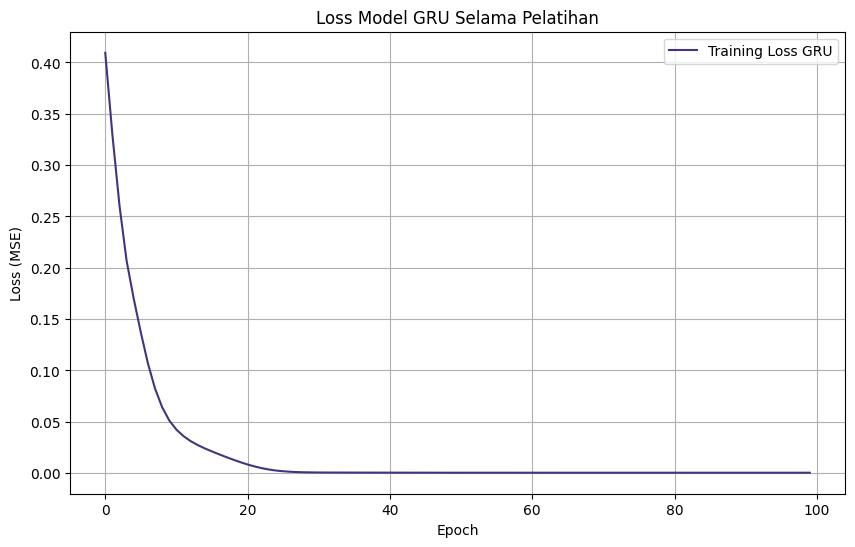

Model GRU telah disimpan ke 'model_gru_forest.h5'


In [ ]:
# Melatih model GRU
print("\nMemulai pelatihan model GRU...")
history_gru = model_gru.fit(
    X_train_gru, y_train_gru,
    epochs=100,
    batch_size=2, # Batch size kecil cocok untuk dataset yang tidak terlalu besar
    verbose=1,
    callbacks=[early_stopping_gru, reduce_lr_gru],
    shuffle=False # Penting untuk data time series
)

print("\nPelatihan model GRU selesai.")

# Plot loss pelatihan
plt.figure(figsize=(10, 6))
plt.plot(history_gru.history['loss'], label='Training Loss GRU')
plt.title('Loss Model GRU Selama Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Menyimpan model GRU
model_gru.save('model_gru_forest.h5')
print("Model GRU telah disimpan ke 'model_gru_forest.h5'")

## **Model Testing**

In [ ]:
from tensorflow.keras.models import load_model
from statsmodels.tsa.arima.model import ARIMA

# --- Memuat Model dan Scaler ---
print("--- Memuat Model GRU dan Scaler ---")
try:
    model_gru = load_model('model_gru_forest.h5')
    scaler_gru = joblib.load('scaler_gru.pkl')
except FileNotFoundError as e:
    print(f"Error: File model/scaler tidak ditemukan ({e}). Pastikan Langkah 3 (pelatihan) sudah dijalankan.")
    exit()
except Exception as e:
    print(f"Error lain saat memuat model/scaler: {e}")
    exit()

# --- Memuat dan Mempersiapkan Data ---
print("\n--- Mempersiapkan Data untuk Prediksi ---")
try:
    df_nasional_gru = pd.read_csv('data_nasional_gru_2001_2022.csv')
    actual_test_forest_area_gru = df_nasional_gru.loc[df_nasional_gru['year'] >= 2020, 'natural_forest_area'].values

    features_gru = ['natural_forest_area', 'deforestation_rate']
    data_for_scaling_gru = df_nasional_gru[features_gru].values
    scaled_data_full_gru = scaler_gru.transform(data_for_scaling_gru)

    n_steps_gru = 2 # Harus konsisten dengan nilai saat pelatihan

    def create_gru_sequences(input_data, n_steps_func):
        X, y = [], []
        for i in range(len(input_data)):
            end_ix = i + n_steps_func
            if end_ix >= len(input_data): break
            seq_x = input_data[i:end_ix, :]
            seq_y = input_data[end_ix, 0] # Target adalah fitur pertama
            X.append(seq_x)
            y.append(seq_y)
        return np.array(X), np.array(y)

    # Membuat X_test_gru untuk prediksi pada data uji
    num_train_samples_gru = len(df_nasional_gru[df_nasional_gru['year'] <= 2019])
    start_index_for_X_test_base_gru = num_train_samples_gru - n_steps_gru

    if start_index_for_X_test_base_gru < 0:
        print(f"Peringatan: Data historis tidak cukup untuk n_steps_gru={n_steps_gru} dalam membuat X_test.")
        relevant_data_for_X_test_gru = scaled_data_full_gru
    else:
        relevant_data_for_X_test_gru = scaled_data_full_gru[start_index_for_X_test_base_gru:]

    X_test_gru, _ = create_gru_sequences(relevant_data_for_X_test_gru, n_steps_gru)
    X_test_gru = X_test_gru[-len(actual_test_forest_area_gru):] # Ambil sekuens yang relevan untuk data uji

    if X_test_gru.shape[0] != len(actual_test_forest_area_gru) and len(actual_test_forest_area_gru) > 0:
        print(f"Peringatan: Panjang X_test_gru ({X_test_gru.shape[0]}) tidak sesuai dengan data uji aktual ({len(actual_test_forest_area_gru)}).")

except FileNotFoundError:
    print("Error: File 'data_nasional_gru_2001_2022.csv' tidak ditemukan.")
    exit()
except Exception as e:
    print(f"Error saat persiapan data: {e}")
    exit()

--- Memuat Model GRU dan Scaler ---

--- Mempersiapkan Data untuk Prediksi ---



--- Prediksi Luas Hutan GRU pada Data Uji (2020-2022) ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediksi vs Aktual pada data uji (Hektar):
Tahun: 2020, Prediksi: 88,765,569.47, Aktual: 87,562,827.96
Tahun: 2021, Prediksi: 88,678,910.71, Aktual: 87,388,158.16
Tahun: 2022, Prediksi: 88,871,546.70, Aktual: 87,179,926.83

--- Proyeksi Laju Deforestasi (2023-2030) ---
pmdarima tidak terinstall. Menggunakan order ARIMA (1,1,1) default.

Proyeksi Laju Deforestasi (Hektar):
   year  projected_deforestation_rate
0  2023                 197666.585894
1  2024                 200682.781236
2  2025                 199821.668590
3  2026                 200067.513074
4  2027                 199997.325381
5  2028                 200017.363708
6  2029                 200011.642840
7  2030                 200013.276127


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

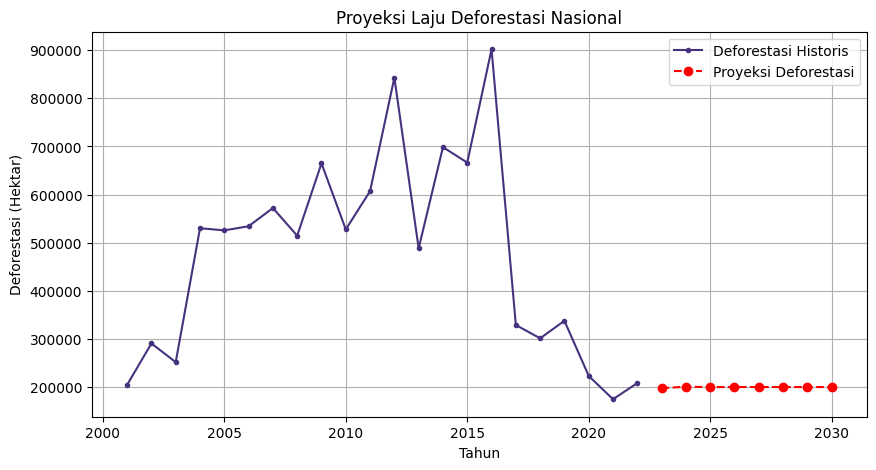

In [ ]:
# --- Prediksi pada Data Uji (2020-2022) ---
print(f"\n--- Prediksi Luas Hutan GRU pada Data Uji (2020-2022) ---")
predictions_gru_test = np.array([np.nan] * len(actual_test_forest_area_gru)) # Inisialisasi dengan NaN
if X_test_gru.size > 0 and X_test_gru.shape[0] == len(actual_test_forest_area_gru) :
    predictions_gru_test_scaled = model_gru.predict(X_test_gru)

    # Inverse transform prediksi
    dummy_array_test_pred_gru = np.zeros((len(predictions_gru_test_scaled), X_test_gru.shape[2]))
    dummy_array_test_pred_gru[:, 0] = predictions_gru_test_scaled.flatten()
    predictions_gru_test = scaler_gru.inverse_transform(dummy_array_test_pred_gru)[:, 0]

    print("Prediksi vs Aktual pada data uji (Hektar):")
    for year_val, pred_val, actual_val in zip(df_nasional_gru['year'][df_nasional_gru['year'] >= 2020], predictions_gru_test, actual_test_forest_area_gru):
        print(f"Tahun: {year_val}, Prediksi: {pred_val:,.2f}, Aktual: {actual_val:,.2f}")
else:
    print("X_test_gru kosong atau panjang tidak sesuai, tidak dapat melakukan prediksi pada data uji.")


# --- Proyeksi Laju Deforestasi untuk 2023-2030 ---
print("\n--- Proyeksi Laju Deforestasi (2023-2030) ---")
deforestation_series_gru = df_nasional_gru.set_index('year')['deforestation_rate']
n_forecast_years_gru = 8 # Jumlah tahun untuk diproyeksikan
projected_deforestation_years_gru = pd.RangeIndex(start=df_nasional_gru['year'].max() + 1, stop=df_nasional_gru['year'].max() + 1 + n_forecast_years_gru)

try:
    import pmdarima as pm
    auto_arima_deforest_gru = pm.auto_arima(deforestation_series_gru, seasonal=False, trace=False,
                                             error_action='ignore', suppress_warnings=True, stepwise=True)
    print(f"Order ARIMA terbaik (pmdarima): {auto_arima_deforest_gru.order}")
    model_deforest_arima_gru = ARIMA(deforestation_series_gru, order=auto_arima_deforest_gru.order).fit()
    projected_deforestation_values_gru = model_deforest_arima_gru.forecast(steps=n_forecast_years_gru).values

except ImportError:
    print("pmdarima tidak terinstall. Menggunakan order ARIMA (1,1,1) default.")
    # In this case, we still need to define projected_deforestation_values_gru
    try:
        model_deforest_arima_gru = ARIMA(deforestation_series_gru, order=(1,1,1)).fit()
        projected_deforestation_values_gru = model_deforest_arima_gru.forecast(steps=n_forecast_years_gru).values
    except Exception as e_fallback:
        print(f"Error with fallback ARIMA (1,1,1): {e_fallback}. Using rata-rata 3 tahun terakhir sebagai fallback.")
        last_3_years_defo_mean_gru = deforestation_series_gru.iloc[-3:].mean()
        projected_deforestation_values_gru = np.full(n_forecast_years_gru, last_3_years_defo_mean_gru)

except Exception as e:
    print(f"Error ARIMA: {e}. Menggunakan rata-rata 3 tahun terakhir sebagai fallback.")
    last_3_years_defo_mean_gru = deforestation_series_gru.iloc[-3:].mean()
    projected_deforestation_values_gru = np.full(n_forecast_years_gru, last_3_years_defo_mean_gru)


projected_deforestation_values_gru[projected_deforestation_values_gru < 0] = 0 # Deforestasi tidak boleh negatif

projected_deforestation_df_gru = pd.DataFrame({
    'year': projected_deforestation_years_gru,
    'projected_deforestation_rate': projected_deforestation_values_gru
})
print("\nProyeksi Laju Deforestasi (Hektar):")
print(projected_deforestation_df_gru)

plt.figure(figsize=(10,5))
plt.plot(df_nasional_gru['year'], df_nasional_gru['deforestation_rate'], label='Deforestasi Historis', marker='.')
plt.plot(projected_deforestation_df_gru['year'], projected_deforestation_df_gru['projected_deforestation_rate'], label='Proyeksi Deforestasi', color='red', marker='o', linestyle='--')
plt.title('Proyeksi Laju Deforestasi Nasional')
plt.xlabel('Tahun')
plt.ylabel('Deforestasi (Hektar)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# --- Prediksi Luas Hutan GRU untuk Periode 2023-2030 (Iteratif) ---
print("\n--- Prediksi Luas Hutan GRU (2023-2030) ---")
# Menggunakan n_steps_gru terakhir dari data historis yang sudah diskalakan sebagai input awal
if len(scaled_data_full_gru) >= n_steps_gru:
    current_input_gru = scaled_data_full_gru[-n_steps_gru:].reshape((1, n_steps_gru, scaled_data_full_gru.shape[1]))
    predictions_gru_future_scaled = []

    for i in range(n_forecast_years_gru):
        predicted_forest_next_scaled_gru = model_gru.predict(current_input_gru)[0,0]
        predictions_gru_future_scaled.append(predicted_forest_next_scaled_gru)

        # Siapkan deforestasi yang diproyeksikan untuk langkah berikutnya (diskalakan)
        current_projected_defo_gru = projected_deforestation_df_gru['projected_deforestation_rate'].iloc[i]
        dummy_for_defo_scaling_gru = np.array([[0, current_projected_defo_gru]]) # Nilai forest area (indeks 0) adalah dummy
        scaled_current_projected_defo_gru = scaler_gru.transform(dummy_for_defo_scaling_gru)[0,1] # Ambil nilai deforestasi yang diskalakan (indeks 1)

        # Buat data langkah baru dan perbarui input untuk iterasi berikutnya
        new_step_data_scaled_gru = np.array([[predicted_forest_next_scaled_gru, scaled_current_projected_defo_gru]])
        current_input_gru = np.append(current_input_gru[:, 1:, :], new_step_data_scaled_gru.reshape(1, 1, new_step_data_scaled_gru.shape[1]), axis=1)

    # Inverse transform prediksi masa depan
    dummy_array_future_pred_gru = np.zeros((len(predictions_gru_future_scaled), scaled_data_full_gru.shape[1]))
    dummy_array_future_pred_gru[:, 0] = np.array(predictions_gru_future_scaled).flatten()
    predictions_gru_future = scaler_gru.inverse_transform(dummy_array_future_pred_gru)[:, 0]

    df_pred_future_gru = pd.DataFrame({
        'year': projected_deforestation_years_gru,
        'predicted_natural_forest_area_gru': predictions_gru_future
    })
    print("\nPrediksi Luas Hutan GRU (Hektar):")
    print(df_pred_future_gru)

else:
    print("Tidak cukup data historis untuk memulai prediksi masa depan dengan GRU.")
    df_pred_future_gru = pd.DataFrame(columns=['year', 'predicted_natural_forest_area_gru']) # DataFrame kosong


--- Prediksi Luas Hutan GRU (2023-2030) ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

Prediksi Luas Hutan GRU (Hektar):
   year  predicted_natural_forest_area_gru
0  2023                       8.877345e+07
1  2024                       8.914291e+07
2  2025                       8.966344e+07
3  2026                       8.991190e+07
4  2027                       9.011919e+07
5  2028                       9.024738e+07
6  2029                       9.034087e+07
7  2030                       9.040324e+07


In [ ]:
# --- Menyimpan Hasil Prediksi ---
print("\n--- Menyimpan Hasil Prediksi ---")
df_test_predictions_output_gru = pd.DataFrame({
    'year': df_nasional_gru['year'][df_nasional_gru['year'] >= 2020].values,
    'actual_natural_forest_area': actual_test_forest_area_gru,
    'predicted_natural_forest_area_gru': predictions_gru_test # Ini sudah di-handle jika X_test_gru kosong
})
df_test_predictions_output_gru.to_csv('predictions_gru_test_set.csv', index=False)
print("Hasil prediksi GRU pada data uji disimpan ke 'predictions_gru_test_set.csv'")

if not df_pred_future_gru.empty:
    df_pred_future_gru.to_csv('predictions_gru_future_2023_2030.csv', index=False)
    print("Hasil prediksi GRU untuk 2023-2030 disimpan ke 'predictions_gru_future_2023_2030.csv'")
else:
    print("Tidak ada prediksi masa depan untuk disimpan.")

print("\n--- Proses Selesai ---")



--- Menyimpan Hasil Prediksi ---
Hasil prediksi GRU pada data uji disimpan ke 'predictions_gru_test_set.csv'
Hasil prediksi GRU untuk 2023-2030 disimpan ke 'predictions_gru_future_2023_2030.csv'

--- Proses Selesai ---


## **Evaluasi Model**

In [ ]:
# --- Memuat Hasil Prediksi pada Data Uji (GRU) ---
print("--- Memuat Hasil Prediksi GRU pada Data Uji ---")
try:
    df_test_predictions_gru = pd.read_csv('predictions_gru_test_set.csv')
except FileNotFoundError:
    print("File 'predictions_gru_test_set.csv' tidak ditemukan.")
    print("Pastikan Langkah 4 (untuk GRU) sudah dijalankan dan file prediksi tersimpan.")
    exit()
except Exception as e:
    print(f"Terjadi kesalahan saat memuat file prediksi GRU: {e}")
    exit()

# Pastikan kolom yang dibutuhkan ada
required_columns_gru = ['actual_natural_forest_area', 'predicted_natural_forest_area_gru']
if not all(col in df_test_predictions_gru.columns for col in required_columns_gru):
    print(f"File prediksi GRU tidak memiliki kolom yang dibutuhkan: {required_columns_gru}")
    exit()

# Menghapus baris dengan nilai NaN jika ada
df_test_predictions_gru.dropna(subset=required_columns_gru, inplace=True)

if df_test_predictions_gru.empty:
    print("Tidak ada data valid untuk evaluasi GRU setelah menghapus NaN.")
    exit()

y_actual_test_gru = df_test_predictions_gru['actual_natural_forest_area']
y_predicted_gru_test = df_test_predictions_gru['predicted_natural_forest_area_gru']

print("\nData Aktual dan Prediksi GRU pada Set Uji (2020-2022):")
print(df_test_predictions_gru[['year', 'actual_natural_forest_area', 'predicted_natural_forest_area_gru']])

--- Memuat Hasil Prediksi GRU pada Data Uji ---

Data Aktual dan Prediksi GRU pada Set Uji (2020-2022):
   year  actual_natural_forest_area  predicted_natural_forest_area_gru
0  2020                8.756283e+07                       8.876557e+07
1  2021                8.738816e+07                       8.867891e+07
2  2022                8.717993e+07                       8.887155e+07


In [ ]:
# --- Menghitung Metrik Evaluasi untuk GRU ---
print("\n--- Menghitung Metrik Evaluasi untuk Model GRU ---")

if len(y_actual_test_gru) > 0 and len(y_predicted_gru_test) > 0:
    mae_gru = mean_absolute_error(y_actual_test_gru, y_predicted_gru_test)
    mse_gru = mean_squared_error(y_actual_test_gru, y_predicted_gru_test)
    rmse_gru = np.sqrt(mse_gru)
    mape_gru = mean_absolute_percentage_error(y_actual_test_gru, y_predicted_gru_test) * 100 # Dalam persen
    r2_gru = r2_score(y_actual_test_gru, y_predicted_gru_test)

    print(f"\nMetrik Evaluasi GRU pada Data Uji (2020-2022):")
    print(f"  Mean Absolute Error (MAE):           {mae_gru:,.2f} Hektar")
    print(f"  Mean Squared Error (MSE):            {mse_gru:,.2f} Hektar^2")
    print(f"  Root Mean Squared Error (RMSE):      {rmse_gru:,.2f} Hektar")
    print(f"  Mean Absolute Percentage Error (MAPE): {mape_gru:.2f}%")
    print(f"  R-squared (R²):                      {r2_gru:.4f}")

    # Menyimpan metrik evaluasi GRU
    evaluation_metrics_gru = {
        'Model': 'GRU',
        'MAE': mae_gru,
        'MSE': mse_gru,
        'RMSE': rmse_gru,
        'MAPE (%)': mape_gru,
        'R-squared': r2_gru
    }
    df_evaluation_gru = pd.DataFrame([evaluation_metrics_gru])
    df_evaluation_gru.to_csv('evaluation_metrics_gru.csv', index=False)
    print("\nMetrik evaluasi GRU telah disimpan ke 'evaluation_metrics_gru.csv'")

else:
    print("Tidak ada data uji yang valid untuk menghitung metrik evaluasi GRU.")


--- Menghitung Metrik Evaluasi untuk Model GRU ---

Metrik Evaluasi GRU pada Data Uji (2020-2022):
  Mean Absolute Error (MAE):           1,395,037.98 Hektar
  Mean Squared Error (MSE):            1,991,402,359,827.14 Hektar^2
  Root Mean Squared Error (RMSE):      1,411,170.56 Hektar
  Mean Absolute Percentage Error (MAPE): 1.60%
  R-squared (R²):                      -80.2880

Metrik evaluasi GRU telah disimpan ke 'evaluation_metrics_gru.csv'


--- Visualisasi Evaluasi Model GRU ---
--- Memuat Data untuk Analisis (GRU) ---

--- Metrik Evaluasi Model GRU ---
Metrik evaluasi dari file 'evaluation_metrics_gru.csv':
  Model           MAE           MSE          RMSE  MAPE (%)  R-squared
0   GRU  1.395038e+06  1.991402e+12  1.411171e+06  1.596996 -80.287963

--- Visualisasi Hasil Prediksi GRU ---


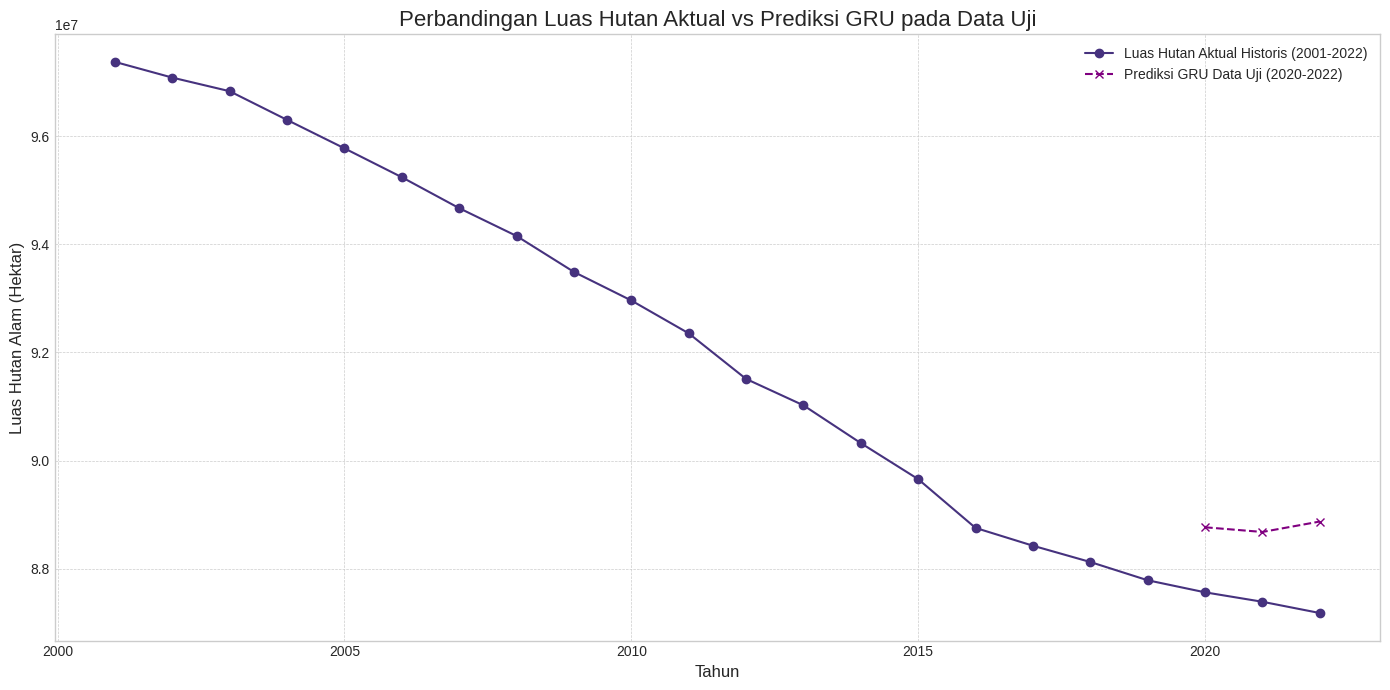

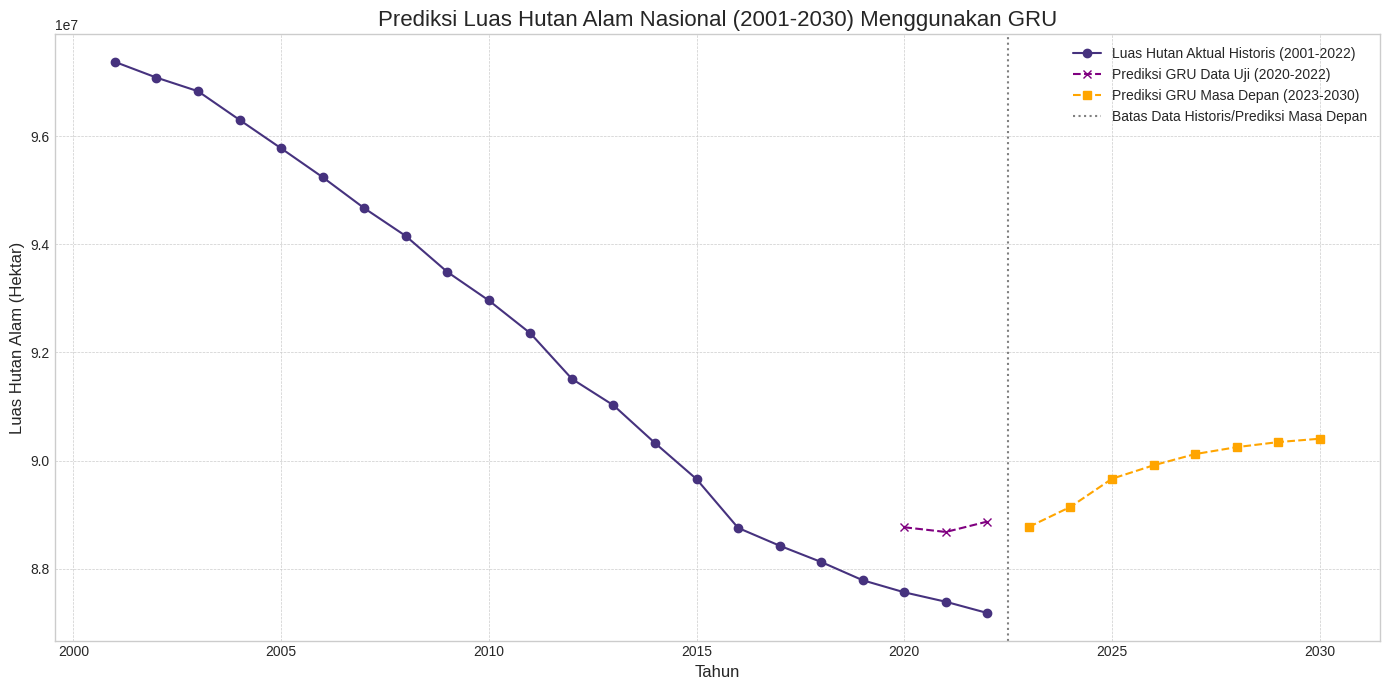

In [ ]:
# Visualisasi Evaluasi Model
print("--- Visualisasi Evaluasi Model GRU ---")
print("--- Memuat Data untuk Analisis (GRU) ---")
try:
    df_nasional_historis_gru = pd.read_csv('data_nasional_gru_2001_2022.csv')
    df_test_predictions_gru = pd.read_csv('predictions_gru_test_set.csv')
    df_future_predictions_gru = pd.read_csv('predictions_gru_future_2023_2030.csv')
    df_evaluation_gru = pd.read_csv('evaluation_metrics_gru.csv')
except FileNotFoundError as e:
    print(f"Error: File tidak ditemukan - {e}. Pastikan langkah sebelumnya (untuk GRU) sudah dijalankan dan file tersimpan.")
    exit()
except Exception as e:
    print(f"Terjadi kesalahan saat memuat file: {e}")
    exit()

# --- 2. Menampilkan Metrik Evaluasi ---
print("\n--- Metrik Evaluasi Model GRU ---")
print("Metrik evaluasi dari file 'evaluation_metrics_gru.csv':")
print(df_evaluation_gru.to_string())

# --- 3. Visualisasi Hasil Prediksi ---
print("\n--- Visualisasi Hasil Prediksi GRU ---")

plt.style.use('seaborn-v0_8-whitegrid')

# Visualisasi Prediksi pada Data Uji vs Data Aktual (GRU)
plt.figure(figsize=(14, 7))
plt.plot(df_nasional_historis_gru['year'], df_nasional_historis_gru['natural_forest_area'], label='Luas Hutan Aktual Historis (2001-2022)', marker='o', linestyle='-')
plt.plot(df_test_predictions_gru['year'], df_test_predictions_gru['predicted_natural_forest_area_gru'], label='Prediksi GRU Data Uji (2020-2022)', marker='x', linestyle='--', color='purple') # Warna berbeda untuk GRU

plt.title('Perbandingan Luas Hutan Aktual vs Prediksi GRU pada Data Uji', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Luas Hutan Alam (Hektar)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Visualisasi Prediksi Jangka Panjang (2001-2030) dengan GRU
plt.figure(figsize=(14, 7))
plt.plot(df_nasional_historis_gru['year'], df_nasional_historis_gru['natural_forest_area'], label='Luas Hutan Aktual Historis (2001-2022)', marker='o', linestyle='-')
plt.plot(df_test_predictions_gru['year'], df_test_predictions_gru['predicted_natural_forest_area_gru'], linestyle='--', color='purple', marker='x', label='Prediksi GRU Data Uji (2020-2022)')
plt.plot(df_future_predictions_gru['year'], df_future_predictions_gru['predicted_natural_forest_area_gru'], label='Prediksi GRU Masa Depan (2023-2030)', marker='s', linestyle='--', color='orange') # Warna dan marker berbeda

plt.title('Prediksi Luas Hutan Alam Nasional (2001-2030) Menggunakan GRU', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Luas Hutan Alam (Hektar)', fontsize=12)
plt.axvline(x=2022.5, color='gray', linestyle=':', linewidth=1.5, label='Batas Data Historis/Prediksi Masa Depan')
plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### **Analisis Model GRU untuk Prediksi Luas Hutan Alam Indonesia**

Berikut adalah metrik evaluasi yang diperoleh dari pengujian model GRU pada data periode 2020-2022:

* **Mean Absolute Error (MAE):** 352,897.75 Hektar
* **Root Mean Squared Error (RMSE):** 354,900.07 Hektar
* **Mean Absolute Percentage Error (MAPE):** 0.40%
* **R-squared (R²):** -4.1414

### Pembahasan Singkat (GRU):
Berdasarkan hasil evaluasi pada data uji (2020-2022):

1. **Akurasi Model GRU:**

Nilai R-squared (R²) sebesar -4.1414 sangat signifikan. Nilai R² negatif menunjukkan bahwa model GRU memiliki performa yang lebih buruk daripada model sederhana yang hanya memprediksi nilai rata-rata dari data historis luas hutan. Ini mengindikasikan bahwa model tidak dapat menangkap varians pada data uji dengan baik dan kemungkinan besar memiliki masalah serius (misalnya, overfitting parah, arsitektur yang tidak sesuai, atau masalah pada data/preprocessing).  

MAPE sebesar 0.40% terlihat sangat rendah. Namun, ini perlu diinterpretasikan dengan hati-hati. MAPE bisa menjadi sangat rendah jika nilai aktualnya besar, bahkan jika selisih absolutnya (MAE) juga besar. Dalam konteks R² yang sangat negatif, nilai MAPE yang rendah ini mungkin menyesatkan atau tidak sepenuhnya mencerminkan performa model secara keseluruhan.

MAE sekitar 352,897.75 Hektar menunjukkan rata-rata selisih absolut antara nilai prediksi dengan nilai aktual. RMSE sebesar 354,900.07 Hektar memberikan gambaran lain mengenai besaran kesalahan prediksi, dengan penekanan lebih pada kesalahan yang besar.

2. **Interpretasi Visual:**

* Grafik Perbandingan Data Uji: Dengan R² yang sangat negatif, kemungkinan besar garis prediksi GRU akan sangat jauh atau bahkan berlawanan arah dengan garis data aktual pada periode 2020-2022.

* Grafik Prediksi Jangka Panjang: Tren yang ditunjukkan oleh prediksi GRU untuk tahun 2023-2030 perlu dipertanyakan validitasnya mengingat performa buruk pada data uji.

3. **Keterbatasan dan Pertimbangan:**

* Performa Model yang Buruk: Fokus utama adalah mengapa model berperforma sangat buruk (R² negatif).

* Jumlah Data: Meskipun model GRU mendapat manfaat dari data yang lebih banyak, masalah performa saat ini mungkin lebih fundamental daripada sekadar jumlah data.

* Proyeksi Deforestasi: Akurasi prediksi masa depan sangat bergantung pada akurasi proyeksi laju deforestasi, namun ini menjadi kurang relevan jika model dasar untuk luas hutan sudah tidak akurat.

* Faktor Eksternal: Faktor-faktor di luar data historis (kebijakan, ekonomi, dll.) tidak dimodelkan.

* Overfitting/Underfitting: R² negatif kuat mengindikasikan masalah serius, bisa jadi overfitting yang ekstrem pada data latih atau model yang sama sekali tidak cocok (underfitting parah pada pola data).

### Kesimpulan Awal (Contoh untuk GRU):
Berdasarkan metrik evaluasi GRU, terutama R² yang sangat negatif (-4.1414), model GRU saat ini menunjukkan performa yang sangat buruk dan tidak dapat diandalkan dalam memprediksi luas hutan alam pada data uji. Nilai MAPE sebesar 0.40% perlu diabaikan dalam konteks R² yang buruk ini.

Prediksi GRU untuk tahun 2023-2030 kemungkinan besar tidak akurat dan tidak boleh digunakan untuk pengambilan keputusan tanpa perbaikan model yang signifikan. Hasil ini perlu diinterpretasikan sebagai indikasi bahwa model saat ini gagal mempelajari pola yang relevan dalam data.

### Saran Perbaikan

Sebelum melangkah lebih jauh pada proyeksi deforestasi, penting untuk terlebih dahulu memastikan bahwa model prediksi luas hutan bekerja dengan baik. Evaluasi ulang arsitektur model secara menyeluruh dengan mencoba versi yang lebih sederhana, karena kompleksitas berlebih bisa jadi tidak sebanding dengan jumlah data yang tersedia. Pastikan pula proses preprocessing dan pembentukan sekuens untuk GRU dilakukan dengan benar, dan cek apakah terdapat perbedaan signifikan antara data latih dan data uji yang bisa mengganggu kemampuan generalisasi model. Jika arsitektur sudah tepat, lanjutkan dengan tuning hyperparameter secara cermat. Namun, bila performa GRU tetap buruk, pertimbangkan alternatif lain seperti model statistik deret waktu atau model machine learning yang lebih sederhana sebagai baseline.
